# Pima Indians Diabetes Database

- `Number of Instances`: **2000**
- `Number of Attributes`: **9**
- `Attributes`: 
  - `Pregnancies`: Number of times pregnant
  - `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test	
  - `BloodPressure`: Diastolic blood pressure (mm Hg)	
  - `SkinThickness`: Triceps skin fold thickness (mm)
  - `Insulin`: 2-Hour serum insulin (mu U/ml)
  - `BMI`: Body mass index (weight in kg/(height in m)^2)
  - `DiabetesPedigreeFunction`: A function which scores the likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.
  - `Age`: Age (years)
  - `Outcome`: Class variable (0 or 1) 684 of 2000 are 1, the others are 0

In [1]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

#spliting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using GridSearchCV to find the best algorithm for this problem 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metric
from sklearn.metrics import classification_report, accuracy_score

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
#lowering #lowercasing all the column names
diabetes_df.columns = diabetes_df.columns.str.lower()

In [5]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [6]:
#renaming the column name 
diabetes_df = diabetes_df.rename(columns={'diabetespedigreefunction': 'diabetes_pedigree_function', \
                                          'bloodpressure': 'blood_pressure', 'skinthickness': 'skin_thickness'})
diabetes_df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [7]:
print(f"The Numbers of Rows and Columns in this data set are: \
{diabetes_df.shape[0]} rows and {diabetes_df.shape[1]} columns.")

The Numbers of Rows and Columns in this data set are: 2000 rows and 9 columns.


# Exploratory Data Analysis(EDA)

In [8]:
#Checking for Data type of columns
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 2000 non-null   int64  
 1   glucose                     2000 non-null   int64  
 2   blood_pressure              2000 non-null   int64  
 3   skin_thickness              2000 non-null   int64  
 4   insulin                     2000 non-null   int64  
 5   bmi                         2000 non-null   float64
 6   diabetes_pedigree_function  2000 non-null   float64
 7   age                         2000 non-null   int64  
 8   outcome                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [10]:
#statistics summary
diabetes_df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [11]:
prof = ProfileReport(diabetes_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

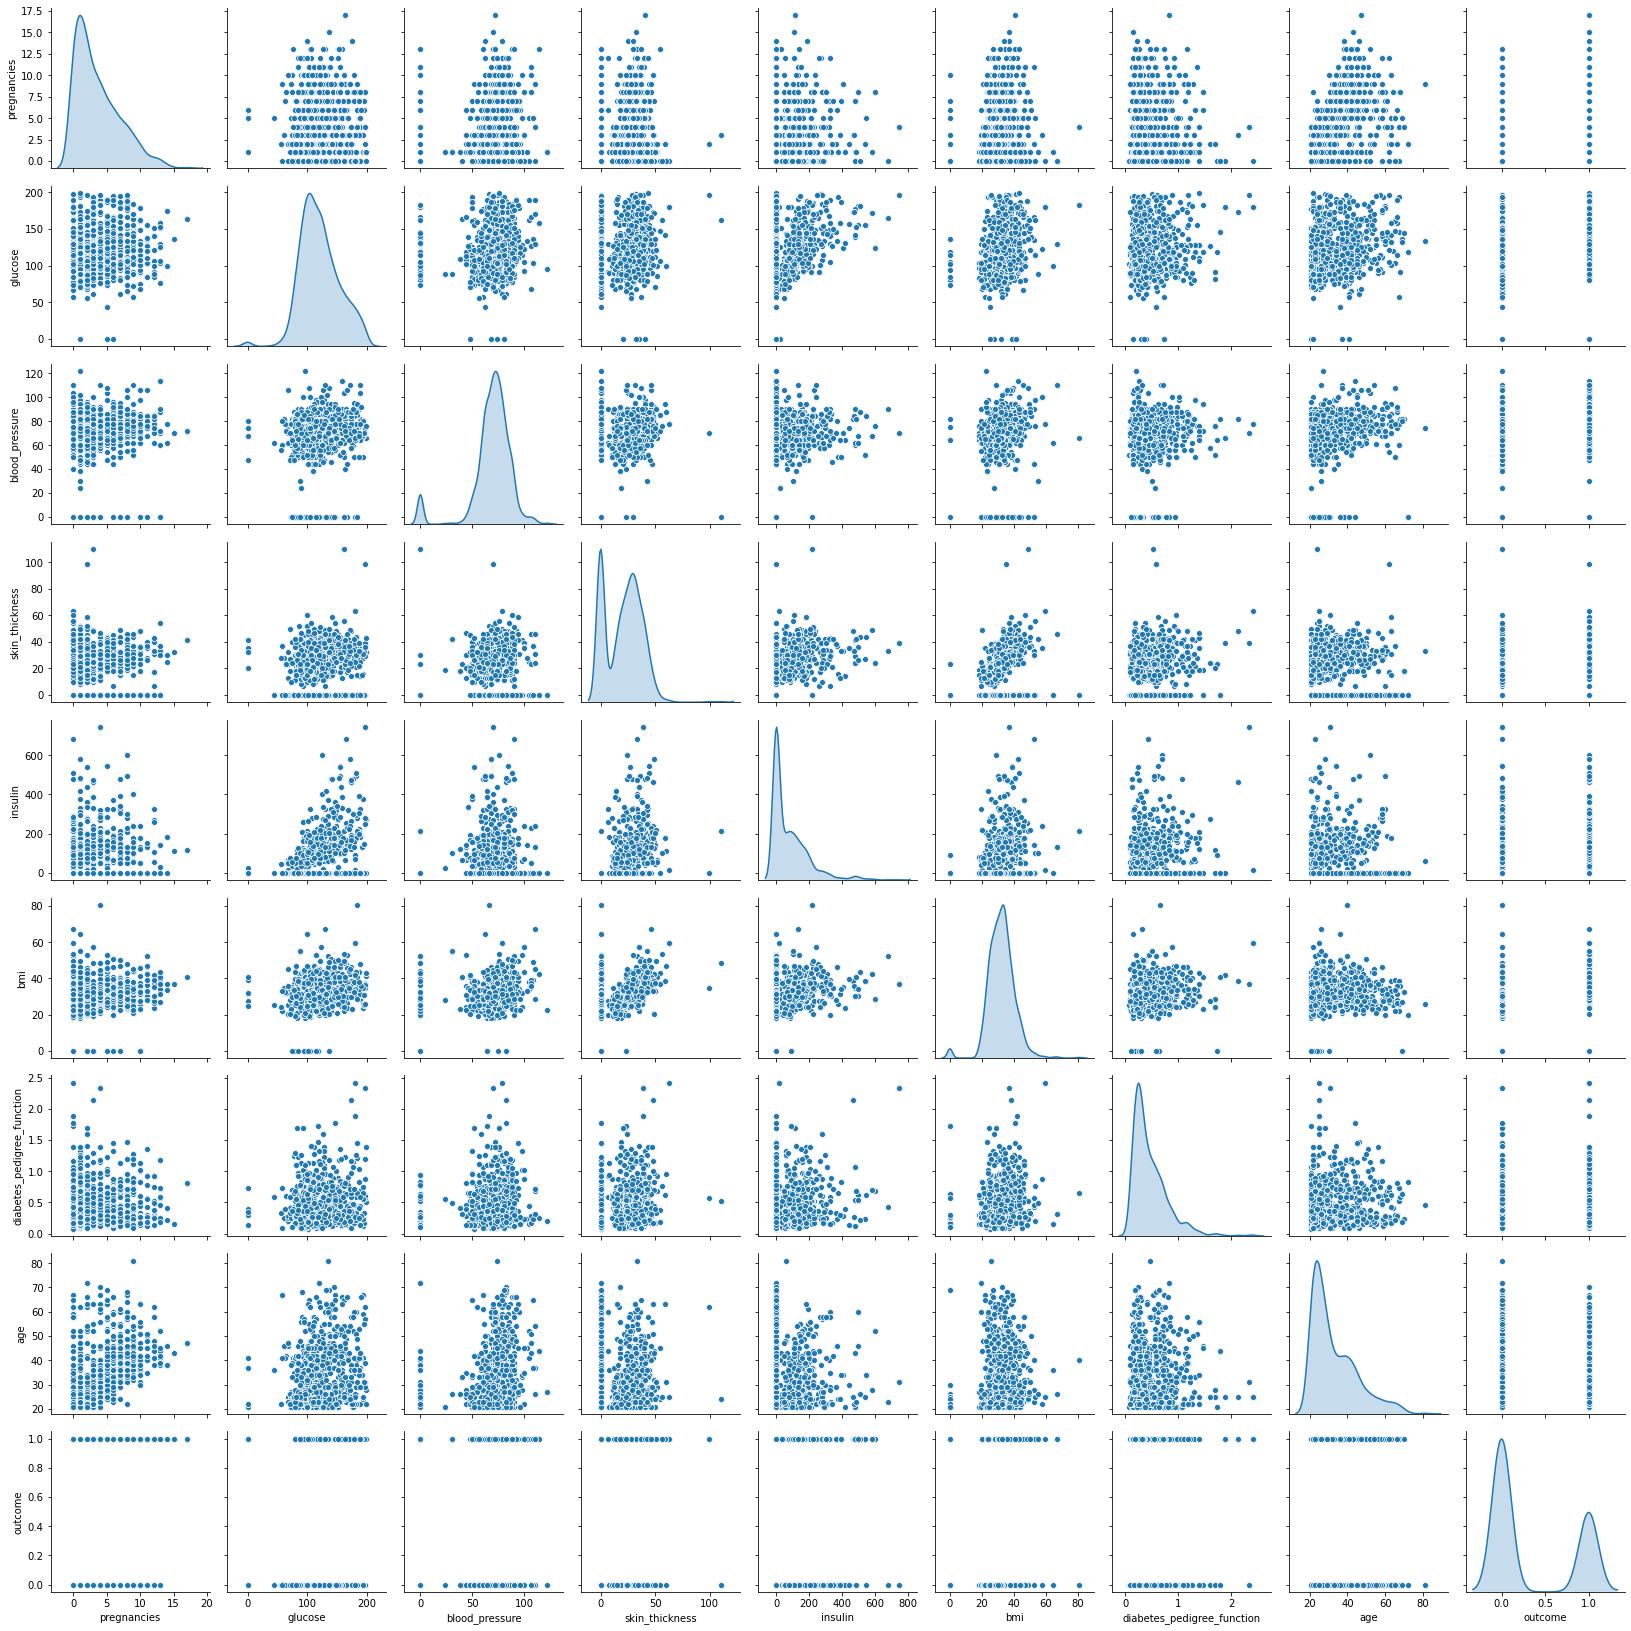

In [12]:
#Checking out the Correlation Matrix
sns.pairplot(diabetes_df, diag_kind="kde");

In [13]:
#creating correlation matrix
corr = diabetes_df.corr()

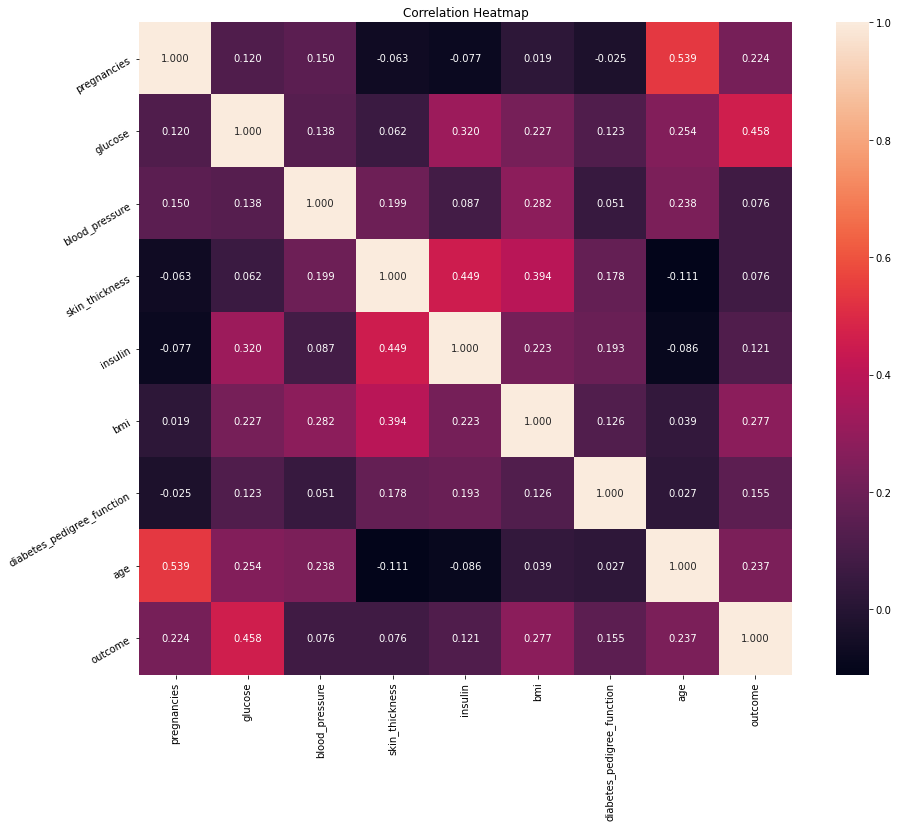

In [14]:
#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

In [15]:
corr_matrix = diabetes_df.corr()
corr_matrix['outcome'].sort_values(ascending=False)

outcome                       1.000000
glucose                       0.458421
bmi                           0.276726
age                           0.236509
pregnancies                   0.224437
diabetes_pedigree_function    0.155459
insulin                       0.120924
skin_thickness                0.076040
blood_pressure                0.075958
Name: outcome, dtype: float64

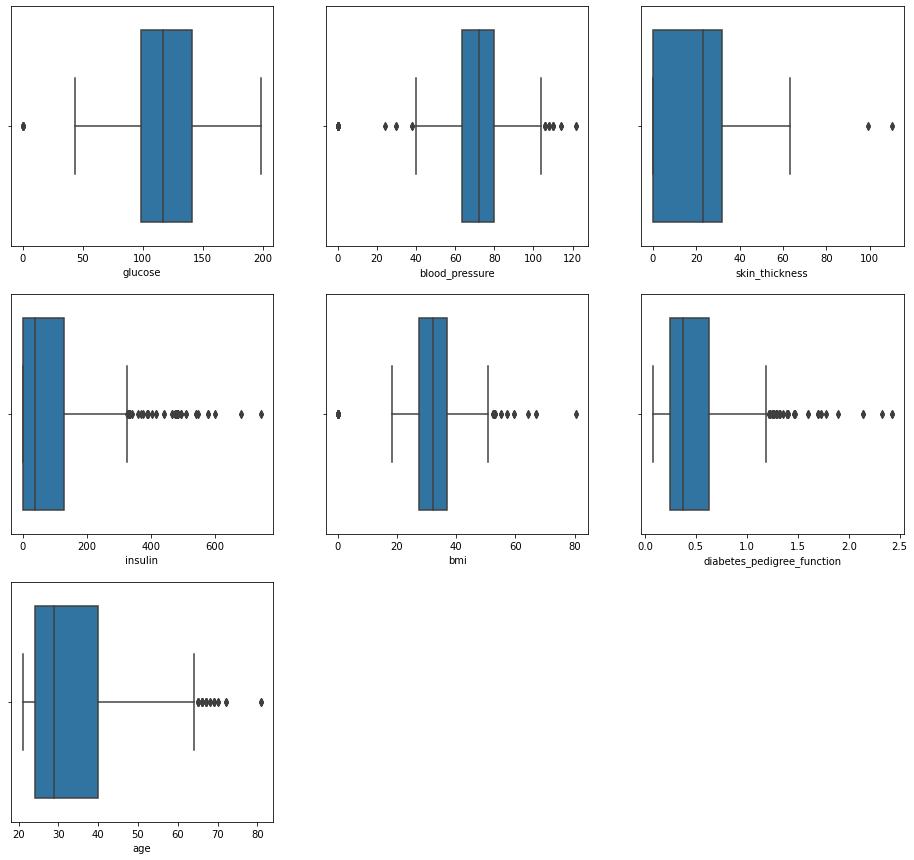

In [16]:
#Checking for outliers
plt.figure(figsize=(16,15)) #(width,height)
plt.subplot(3,3,1) #(row, column, plot_number)
sns.boxplot(x='glucose', data=diabetes_df);
plt.subplot(3,3,2)
sns.boxplot(x='blood_pressure', data=diabetes_df);
plt.subplot(3,3,3)
sns.boxplot(x='skin_thickness', data=diabetes_df);
plt.subplot(3,3,4)
sns.boxplot(x='insulin', data=diabetes_df);
plt.subplot(3,3,5)
sns.boxplot(x='bmi', data=diabetes_df);
plt.subplot(3,3,6)
sns.boxplot(x='diabetes_pedigree_function', data=diabetes_df);
plt.subplot(3,3,7)
sns.boxplot(x='age', data=diabetes_df);

In [17]:
#counting the missing values in numerical features
diabetes_df.isnull().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

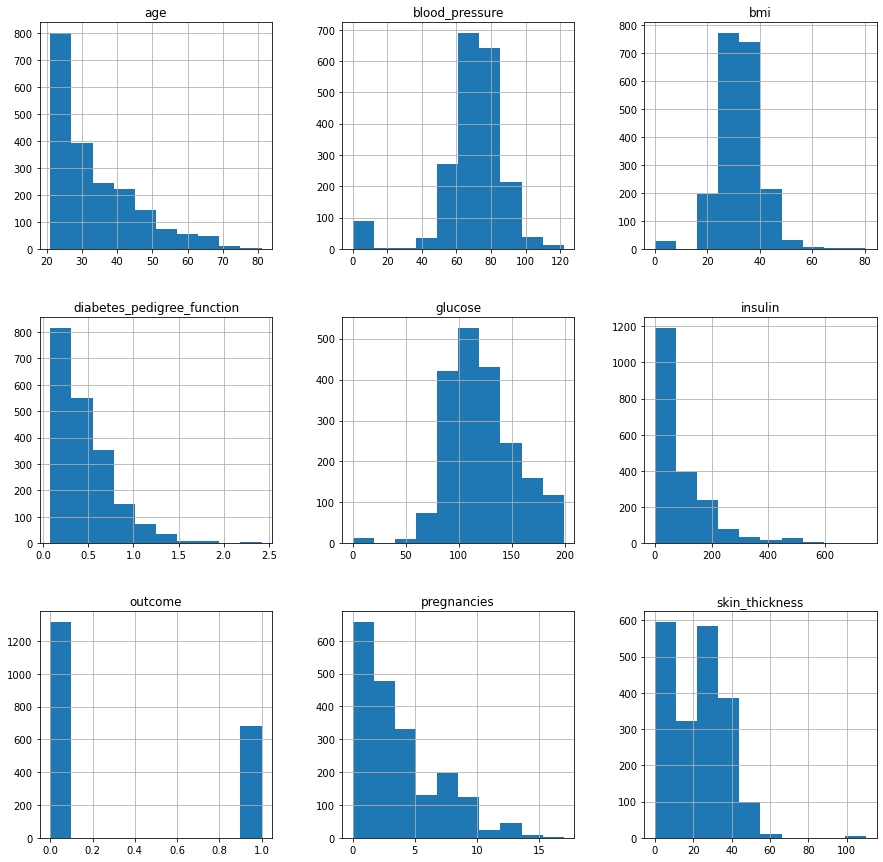

In [18]:
#distribution
diabetes_df.hist(figsize=(15,15));

In [19]:
for index in diabetes_df.columns:
    print(index, '\n', diabetes_df[index].value_counts().head(2), '\n','-'*30)

pregnancies 
 1    356
0    301
Name: pregnancies, dtype: int64 
 ------------------------------
glucose 
 99     49
100    44
Name: glucose, dtype: int64 
 ------------------------------
blood_pressure 
 74    145
70    144
Name: blood_pressure, dtype: int64 
 ------------------------------
skin_thickness 
 0     573
32     83
Name: skin_thickness, dtype: int64 
 ------------------------------
insulin 
 0      956
105     31
Name: insulin, dtype: int64 
 ------------------------------
bmi 
 31.2    33
32.0    33
Name: bmi, dtype: int64 
 ------------------------------
diabetes_pedigree_function 
 0.258    16
0.207    15
Name: diabetes_pedigree_function, dtype: int64 
 ------------------------------
age 
 22    192
21    166
Name: age, dtype: int64 
 ------------------------------
outcome 
 0    1316
1     684
Name: outcome, dtype: int64 
 ------------------------------


# Feature Scaling

<!-- - As there are soo many of 0's, so according to dicussion on kaggle we can replace 0 with mean/median [link of the dicussion](https://www.kaggle.com/uciml/pima-indians-diabetes-database/discussion/216678). -->

In [20]:
# segregating the target variable
X = diabetes_df.drop(columns='outcome')
y = diabetes_df['outcome']
#spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Selecting and Training Models

In [22]:
print(f"In X_train dataset there are: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test dataset there are: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

In X_train dataset there are: 1600 rows and 8 columns.
In X_test dataset there are: 400 rows and 8 columns.
The shape of y_train is: (1600,)
The shape of y_test is: (400,)


In [23]:
X_train[:3]

array([[ 2.54014777, -0.01485297,  0.466638  , -0.2337741 , -0.71569898,
        -0.70153446, -0.65077302,  2.50732972],
       [ 4.06518958,  1.29329836,  0.16097992,  1.24366592,  0.29494207,
         1.04410009,  1.04381097,  1.21199837],
       [-0.81494422, -0.60663571,  0.26286595, -1.28029412, -0.71569898,
         0.87438562, -0.5475188 ,  0.78022125]])

In [24]:
def best_model(X, y):
    """
    This function is for finding best model for this problem and tell the best parameter along with it.
    """
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.903750
2,random_forest,{'n_estimators': 50},0.951250
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.869375


In [25]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X_train, y_train, cv=10)
print(f'Average Accuracy : {round(sum(scores)/len(scores) * 100, 3)}%')

Average Accuracy : 96.062%


In [26]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=42)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)

In [27]:
print(f"Accuracy on trainning set: {round(accuracy_score(y_train, y_train_pred), 4)*100}%")

Accuracy on trainning set: 99.94%


- `n_estimators= [200, 100, 50] all are giving 100% accuracy as we know that no model is prefect`

# Evaluating the entire system on Test Data


In [28]:
y_test_pred = classifier.predict(X_test)
print(f"Accuracy on trainning set: {round(accuracy_score(y_test, y_test_pred), 4)*100}%")

Accuracy on trainning set: 97.75%


In [29]:
#Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       272
           1       1.00      0.93      0.96       128

    accuracy                           0.98       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.98      0.98      0.98       400



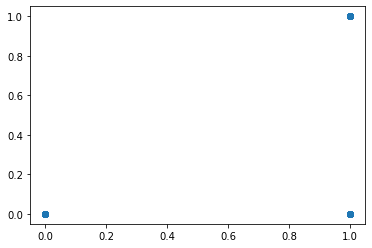

In [31]:
plt.scatter(y_test, y_test_pred);

# Save the Model

In [32]:
import pickle 
file = open('model.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(classifier, file) #dump information to that file

In [33]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = int(Glucose)
    bp = int(BloodPressure)
    st = int(SkinThickness)
    insulin = int(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 138, 62, 35, 0, 33.6, 0.127, 47)[0]
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.
